# Are Fandando Movie Ratings still Inflated?
In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that [Fandango](https://www.fandango.com/)'s rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this [article](https://fivethirtyeight.com/features/fandango-movies-ratings/). 

The purpose of this project is to analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

One of the best ways to figure out whether there has been any change in Fandango's rating system is to compare the system's characteristics previous and after the analysis. Fortunately, there are ready-made data for both these periods of time:

- Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango).

- One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17).

## Exploring the Datasets

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load data with all columns dispayed
pd.set_option('display.max_columns', 25)
before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
# isolate columns about ratings
ratings_before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 
                         'Fandango_Difference']].copy()
ratings_after = after[['movie', 'year', 'fandango']].copy()

In [5]:
ratings_before.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [6]:
ratings_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


The goal of the project is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. As both data sets consist of samples of data, not the whole population, it is important to make sure that the samples are representative for the population and can be used to answer the question. 

From [this](https://github.com/fivethirtyeight/data/tree/master/fandango) and [this](https://github.com/mircealex/Movie_ratings_2016_17) READ.ME files, it is obvious that not every movie has equal chance to be included in the sample. The first dataset contains movies that have at least 30 fan reviews on Fandango. And the second one contains movie ratings data for the most popular movies. 

So, we can conclude that the sampling process was not random and resulting samples are unlikely to be representative of the population.

At this point, we have at least two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it.

## Changing the Goal of the Project
The new goal of this project is to determine whether there has been any change in Fandango's rating system ***for popular movies*** after Hickey's analysis.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [7]:
ratings_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above I used a value of 1 as the random seed. This is good practice because it suggests that I wasn't trying out various random seeds just to get a favorable sample.

As of April 2018, these are the fan ratings:

|Movie|	Fan ratings|
|-----|------------|
|Mechanic: Resurrection|	2247|
|Warcraft|	7271|
|Max Steel|	493|
|Me Before You|	5263|
|Fantastic Beasts and Where to Find Them|	13400|
|Cell|	17|
|Genius|	127|
|Sully|	11877|
|A Hologram for the King|	500|
|Captain America: Civil War|	35057|
90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

Let's also double-check the first dataset for popular movies:

In [8]:
sum(ratings_before['Fandango_votes'] < 30)

0

All movies in the first dataset have 30 or more votes. Now, we can move on to start analyzing the two samples.

# Exploratory Data Analysis
## Comparing Distribution Shapes

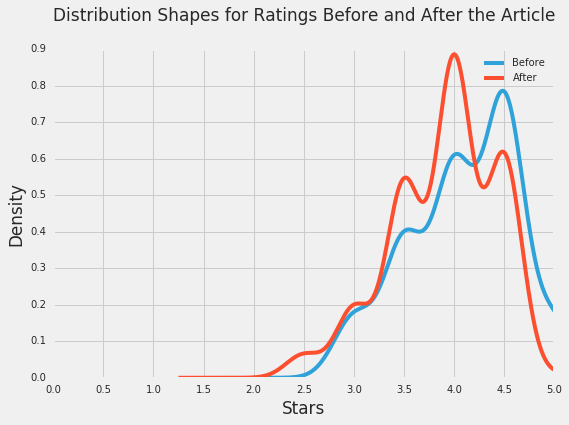

In [9]:
plt.style.use('fivethirtyeight')
ratings_before['Fandango_Stars'].plot.kde(label='Before', legend=True, figsize = (8,5.5))
ratings_after['fandango'].plot.kde(label='After', legend=True)
plt.title('Distribution Shapes for Ratings Before and After the Article', fontsize=17, 
          y=1.07) #'y' parameter moves title up
plt.xlabel('Stars')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlim(0,5)
plt.show()

Based on these kernel density plots, two conclusions can be made:
- both of the distributions are negatively skewed.
- second distribution (after the article) is slightly shifted to the left.

Negatively skewed distribution means that there are more higher ratings than lower ones. And the fact that second distribution is shifted to the left proves that there is a change in ratings for popular movies before and after the article. After the article, movies were rated lower than before. 

## Comparing Relative Frequencies
While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

In [10]:
ratings_before['Fandango_Stars'].value_counts(normalize=True) * 100

4.5    37.671233
4.0    28.082192
3.5    18.493151
3.0     8.219178
5.0     7.534247
Name: Fandango_Stars, dtype: float64

In [11]:
ratings_after['fandango'].value_counts(normalize=True) * 100

4.0    38.317757
4.5    26.635514
3.5    23.364486
3.0     8.411215
2.5     2.803738
5.0     0.467290
Name: fandango, dtype: float64

There is still a clear difference between two frequency distributions:
- Before more than 7.5% of movies got 5.0 stars, after only 0.5%
- Before the most frequent star was 4.5, after it became 4.0
- The lowest rating used to be 3.0 and later it lowered to 2.5
- Percentages of some of the ratings stars went up: from 28.1% to 38.3% for 4.0 stars and from 18.5% to 23.4% for 3.5 stars. We saw the same on the kernel density plots.

## Determining the Direction of the Change
We confirmed with the two tables before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots.

Let's take a couple of summary metrics to get a more precise picture about the direction of the change. In what follows, we'll compute the mean, the median, and the mode for both distributions and then use a bar graph to plot the values.

In [12]:
mean_before = ratings_before['Fandango_Stars'].mean()
median_before = ratings_before['Fandango_Stars'].median()
mode_before = ratings_before['Fandango_Stars'].mode()[0]

mean_after = ratings_after['fandango'].mean()
median_after = ratings_after['fandango'].median()
mode_after = ratings_after['fandango'].mode()[0]

summary = pd.DataFrame()
summary['before'] = [mean_before, median_before, mode_before]
summary['after'] = [mean_after, median_after, mode_after]
summary.index = ['mean', 'median', 'mode']
summary

,before,after
mean,4.089041,3.89486
median,4.000000,4.00000
mode,4.500000,4.00000


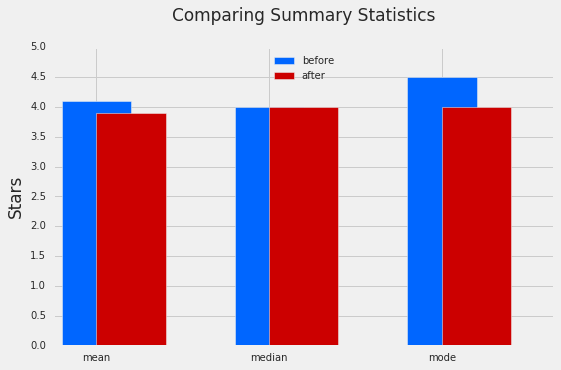

In [13]:
# generate grouped bar plot
summary['before'].plot.bar(rot=0, align='center', color='#0066FF', width=.4, label='before',
                          figsize = (8,5))
summary['after'].plot.bar(rot=0, align='edge', color='#CC0000', width=.4, label='after')
plt.title('Comparing Summary Statistics', fontsize=17, y=1.07)
plt.ylabel('Stars')
plt.yticks(np.arange(0,5.1,.5))
plt.ylim(0,5)
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

## Conclusions
This analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies before and after Walt Hickey's article in 2015. I also determined that, on average, popular movies released after the article were rated lower on Fandango than popular movies released before it.

I cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system.